In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

2023-06-15 20:42:52.706427: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-15 20:42:52.725709: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-15 20:42:53.063367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10


2023-06-15 20:42:53.827975: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 20:42:53.846509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-15 20:42:53.846643: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

375/375 [==============================] - 1s 1ms/step - loss: 0.6269 - accuracy: 0.8116 - val_loss: 0.2814 - val_accuracy: 0.9143
Epoch 2/10
375/375 [==============================] - 0s 836us/step - loss: 0.2532 - accuracy: 0.9214 - val_loss: 0.2120 - val_accuracy: 0.9368
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1681 - accuracy: 0.9470 - val_loss: 0.1464 - val_accuracy: 0.9585
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9644 - val_loss: 0.1454 - val_accuracy: 0.9572
Epoch 5/10
375/375 [==============================] - 0s 892us/step - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.1449 - val_accuracy: 0.9599
Epoch 6/10
375/375 [==============================] - 0s 946us/step - loss: 0.0641 - accuracy: 0.9790 - val_loss: 0.1497 - val_accuracy: 0.9576
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0475 - accuracy: 0.9846 - val_loss: 0.1466 - val_accuracy: 0.9608
Epoch 8/10


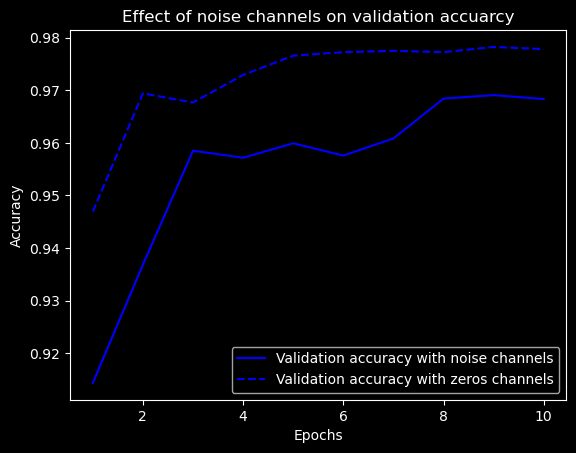

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuarcy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()